In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from cycler import cycler

# John's Family Tree

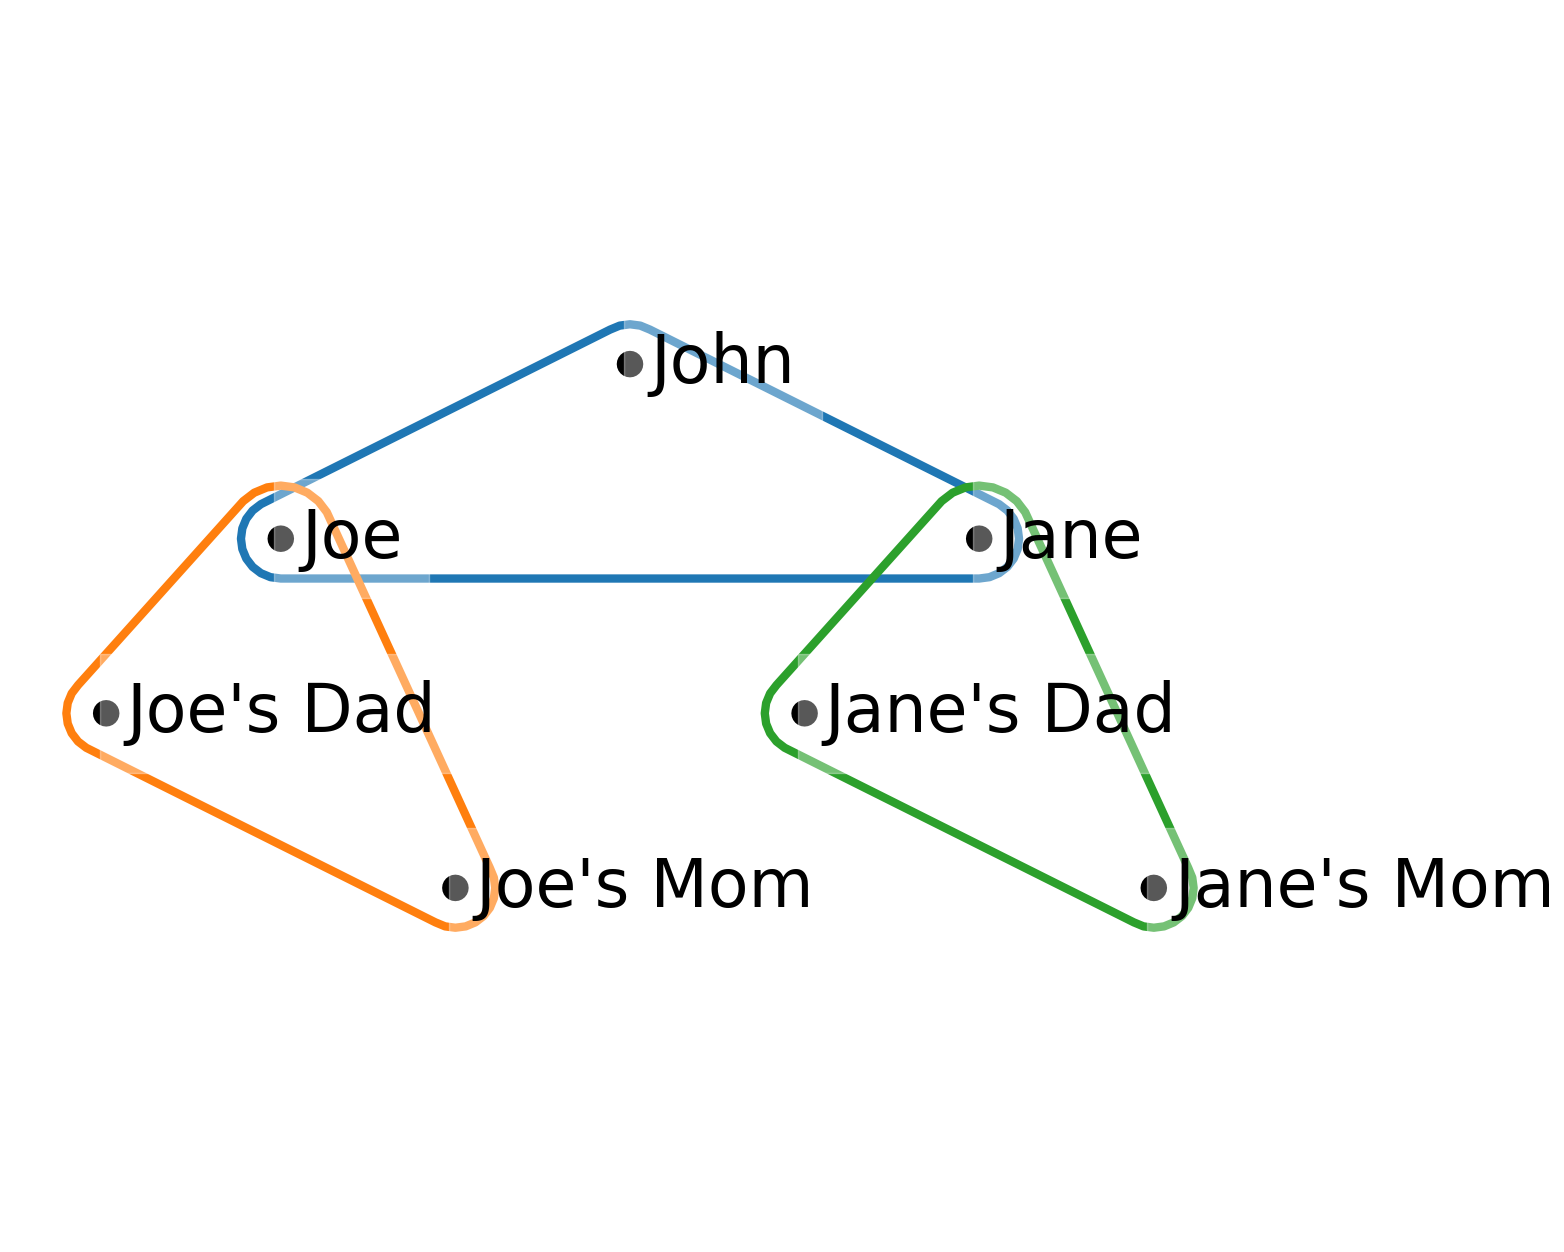

In [325]:
# John's Family Tree Hypergraph

scenes = {
    '$e_1$': ['John', 'Joe', 'Jane'],
    '$e_2$': ['Joe', "Joe's Dad", "Joe's Mom"],
    '$e_3$': ['Jane', "Jane's Dad", "Jane's Mom"]
}


H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    'John': (-4, 10),
    'Joe': (-8, 8),
    'Jane': (0, 8),
    "Joe's Dad": (-10, 6),
    "Joe's Mom": (-6, 4),
    "Jane's Mom": (2, 4),
    "Jane's Dad": (-2, 6)
}

fig,ax = plt.subplots(1,1,figsize=(16,16))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6
    }
)

plt.savefig("familyTreeHypergraph.png",dpi=300, bbox_inches = "tight")


# Trees

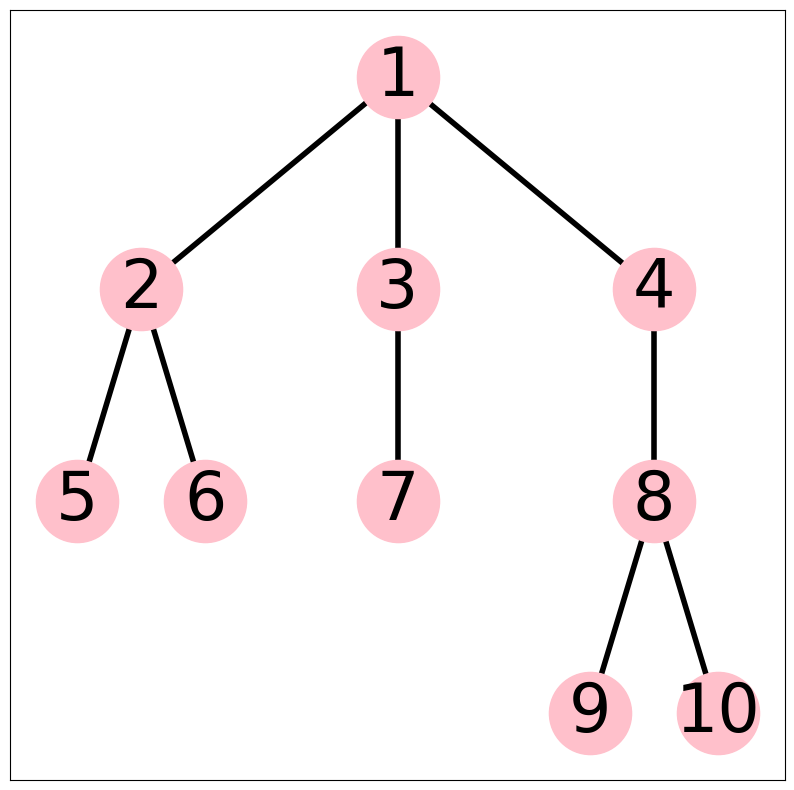

In [235]:
# Tree

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {1: [2, 3, 4],
         2: [5, 6],
         3: [7],
         4: [8],
         8:[9, 10]
}

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 1)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)
plt.savefig("tree.png")

# Chordal vs. Non Chordal

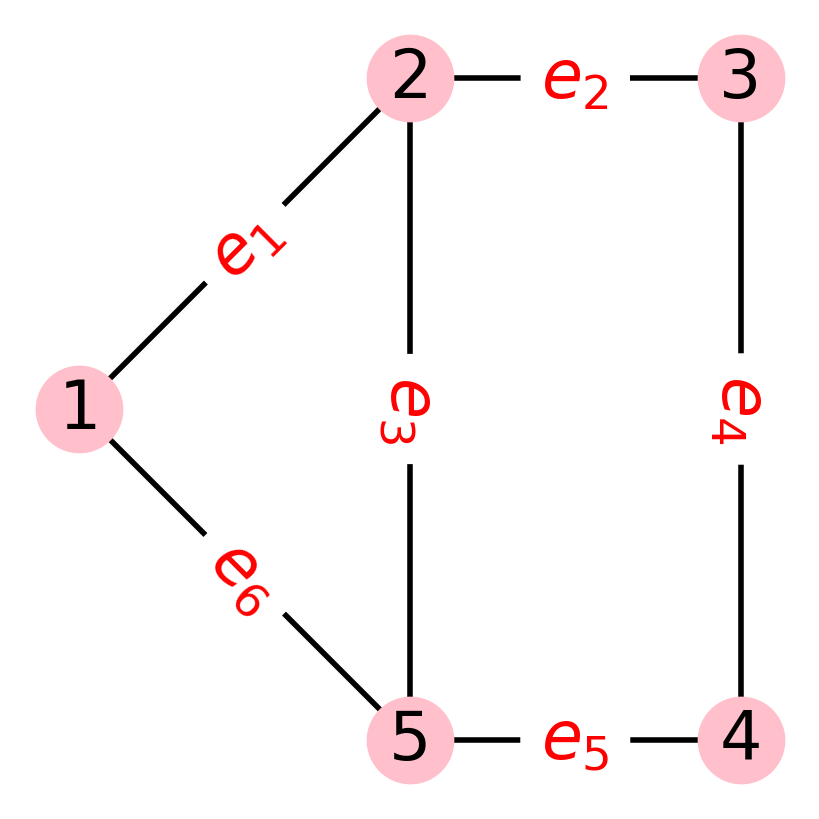

In [269]:
# Not Chordal

edges = [[1, 2], [2, 3], [2, 5], [3, 4], [4, 5], [5, 1]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 


G.add_node(1, level=0)
G.add_node(2, level=1)
G.add_node(5, level=1)
G.add_node(3, level=2)
G.add_node(4, level=2)

G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=4, linewidths=4,
    node_size = 3500, font_size = 48, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)

#pos = nx.spring_layout(G) # Position layout of G

# Draw the graph
# nx.draw(
#     G, pos, edge_color='black', width=1, linewidths=1,
#     node_size=500, node_color='pink', alpha=0.9,
#     labels={node: node for node in G.nodes()} 
# )

#  Add labels to the graph
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 2): '$e_1$', 
        (2, 3): '$e_2$', 
        (2, 5): '$e_3$',
        (3, 4): '$e_4$', 
        (4, 5): '$e_5$',
        (5, 1): '$e_6$'},
    font_color = 'red',
    font_size = 48
)

plt.savefig('nonChordal_5.png')

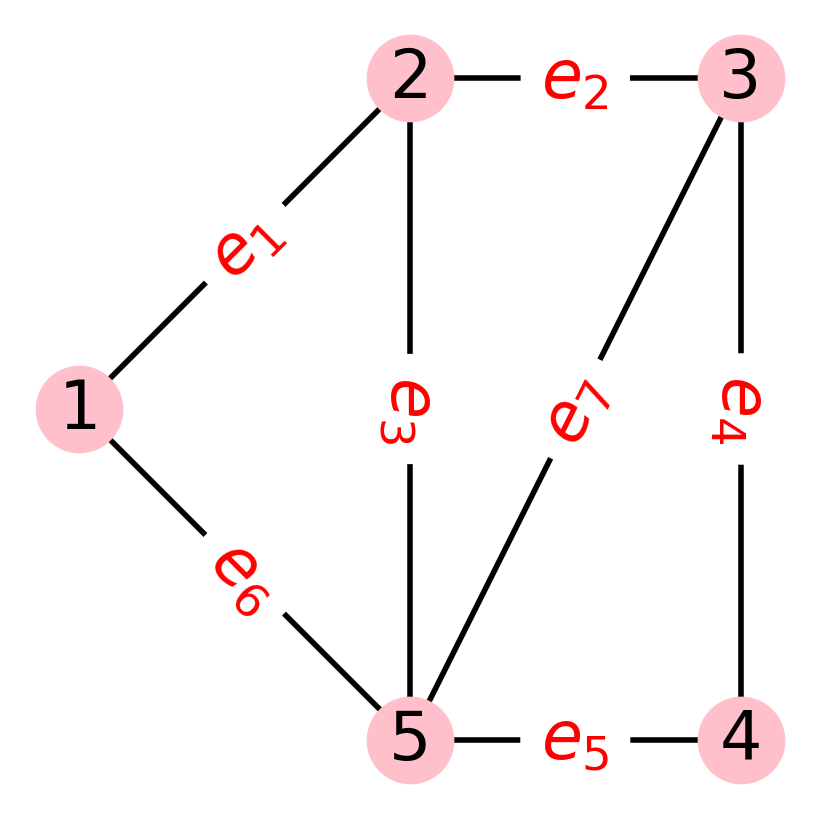

In [267]:
# Chordal

edges = [[1, 2], [2, 3], [2, 5], [3, 4], [4, 5], [5, 1], [3, 5]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 


G.add_node(1, level=0)
G.add_node(2, level=1)
G.add_node(5, level=1)
G.add_node(3, level=2)
G.add_node(4, level=2)

G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=4, linewidths=4,
    node_size = 3500, font_size = 48, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)

#pos = nx.spring_layout(G) # Position layout of G

# Draw the graph
# nx.draw(
#     G, pos, edge_color='black', width=1, linewidths=1,
#     node_size=500, node_color='pink', alpha=0.9,
#     labels={node: node for node in G.nodes()} 
# )

#  Add labels to the graph
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 2): '$e_1$', 
        (2, 3): '$e_2$', 
        (2, 5): '$e_3$',
        (3, 4): '$e_4$', 
        (4, 5): '$e_5$',
        (5, 1): '$e_6$',
        (3, 5) : '$e_7$'},
    font_color = 'red',
    font_size = 48
)

plt.savefig('chordal_5.png')

# Interval Graphs

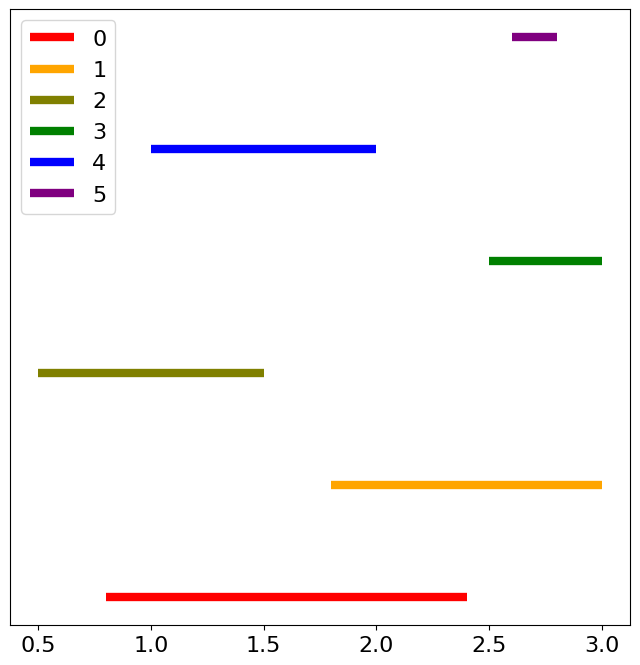

In [238]:
# Family of intervals

intervals = [(0.8, 2.4), (1.8, 3), (0.5, 1.5), (2.5, 3), (1, 2), (2.6, 2.8)]

plt.rc('xtick',labelsize=16)

num_intervals = len(intervals)
viridis = ['Red', 'Orange', 'Olive', 'Green', 'Blue', 'Purple']

fig, ax = plt.subplots()
for idx, (min_int, max_int) in enumerate(intervals):
  ax.hlines(y=idx, xmin=min_int, xmax=max_int, colors=viridis[idx], label=idx, lw=6)
ax.legend(loc='upper left', fontsize=16)
plt.yticks([], [])

plt.savefig('intervalFamily.png')


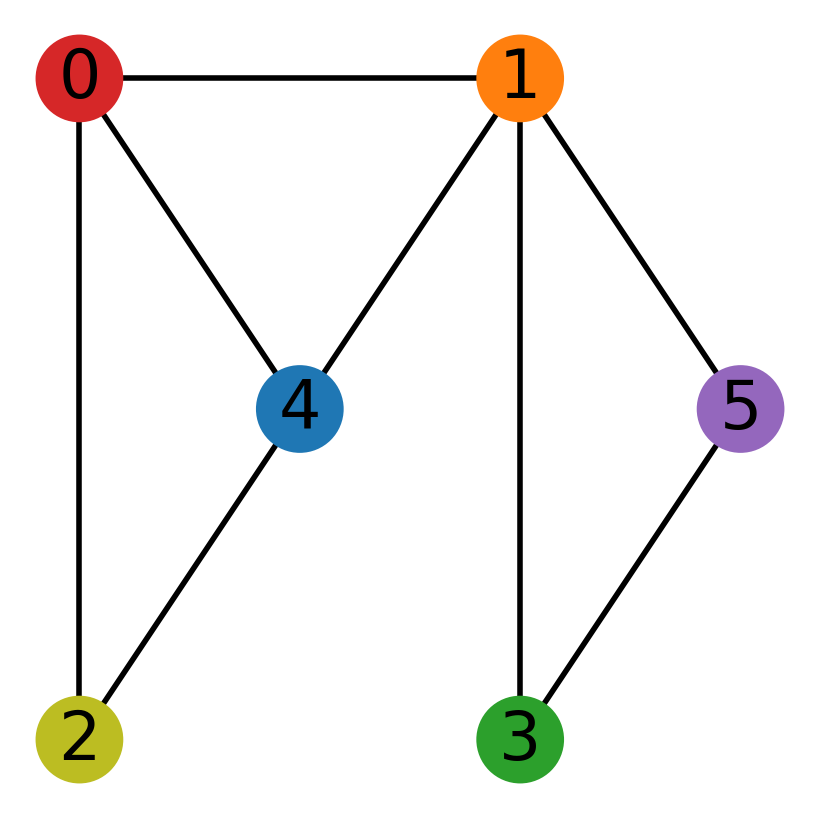

In [239]:
# Interval graph for the family of intervals above

edges = [[0, 1], [0, 2], [0, 4], [1, 3], [1, 4], [1, 5], [2, 4], [3, 5]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 

G.add_node(0, nodetype='tab:red', level=0)
G.add_node(1, nodetype='tab:orange', level=2)
G.add_node(2, nodetype='tab:olive', level=0)
G.add_node(3, nodetype='tab:green', level=2)
G.add_node(4, nodetype='tab:blue', level=1)
G.add_node(5, nodetype='tab:purple', level=3)


G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

colors = [u[1] for u in G.nodes(data="nodetype")]

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=4, linewidths=4,
    node_size=3500, font_size = 48, node_color=colors, alpha=1,
    labels={node: node for node in G.nodes()} 
)

plt.savefig('intervalFamilyIntersectionGraph.png')

# Family Subtrees

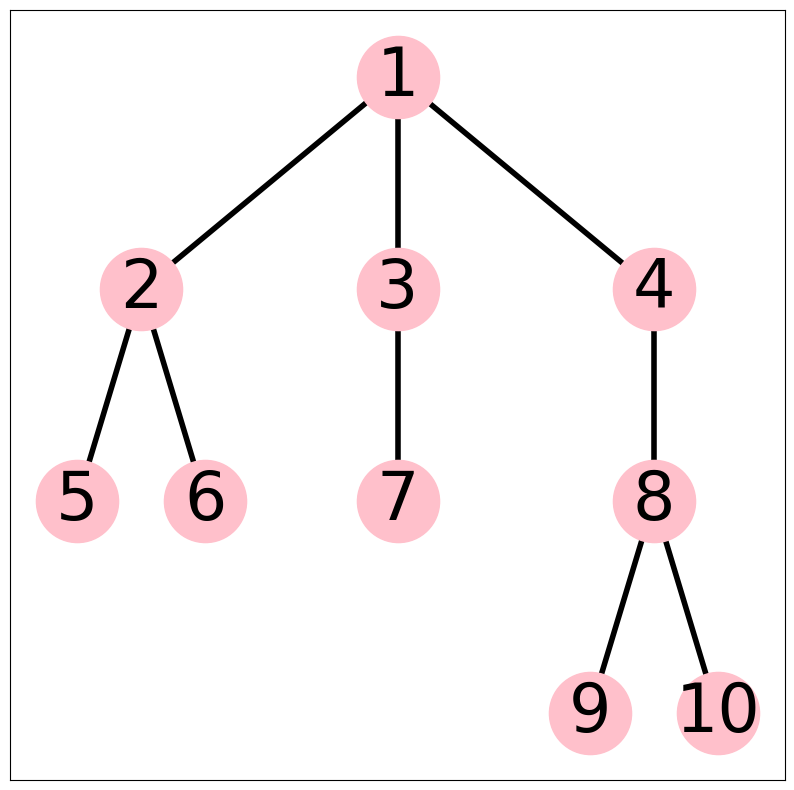

In [240]:
# R1

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {1: [2, 3, 4],
         2: [5, 6],
         3: [7],
         4: [8],
         8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 1)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)
plt.savefig("R1.png")

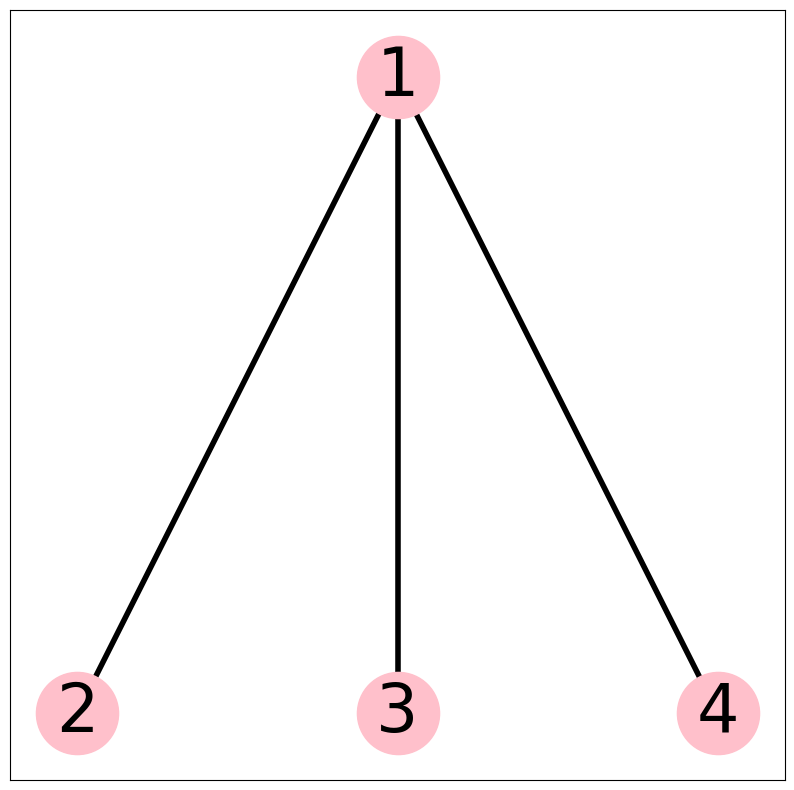

In [241]:
# R2

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {1: [2, 3, 4],
         # 2: [5, 6],
         # 3: [7],
         # 4: [8],
         # 8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 1)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)
plt.savefig("R2.png")

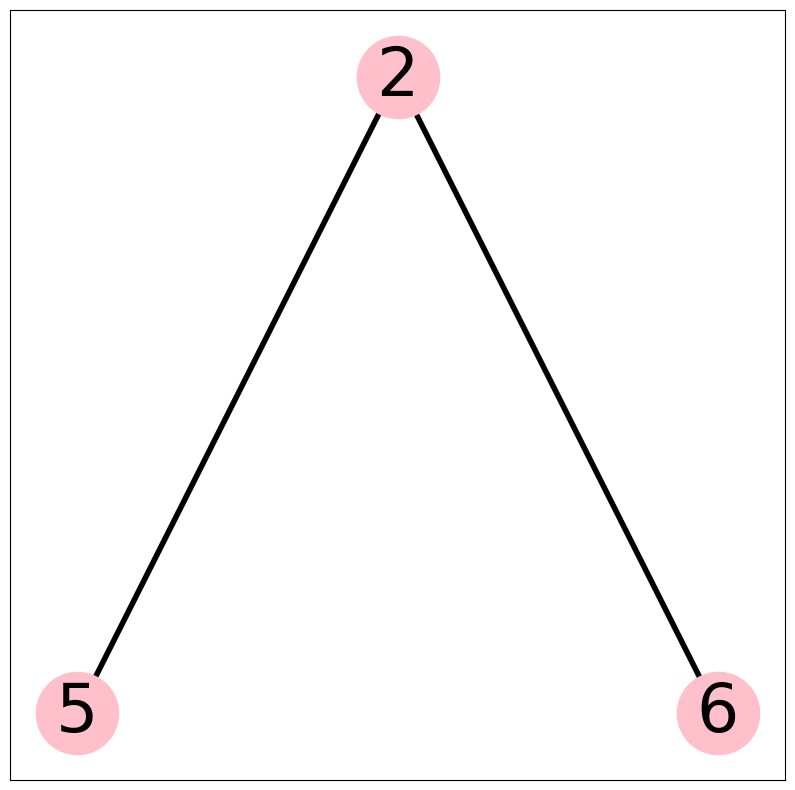

In [242]:
# R3

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {#1: [2, 3, 4],
         2: [5, 6]
         # 3: [7],
         # 4: [8],
         # 8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 2)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)

plt.savefig("R3.png")

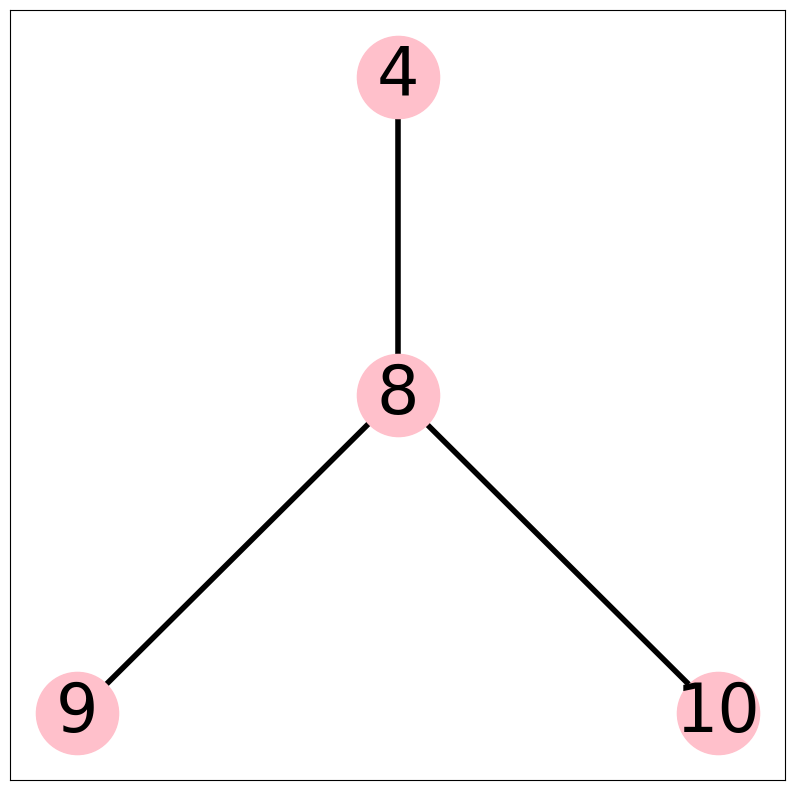

In [243]:
# R4

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {#1: [2, 3, 4],
         # 2: [5, 6],
         # 3: [7],
         4: [8],
         8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 4)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)
plt.savefig("R4.png")

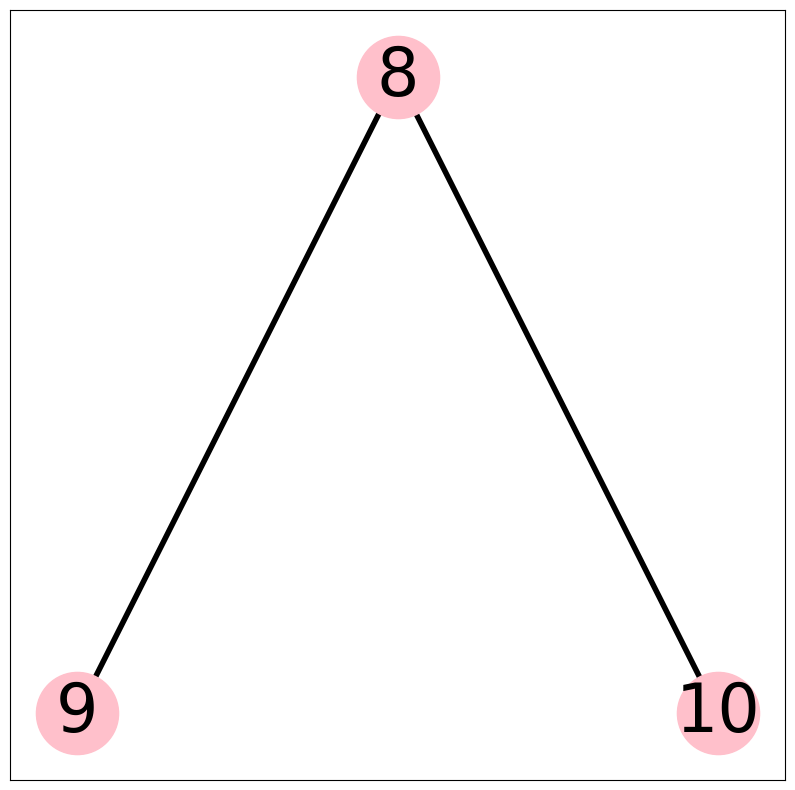

In [244]:
# R5

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {#1: [2, 3, 4],
         # 2: [5, 6],
         # 3: [7],
         # 4: [8],
         8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 8)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 3500, edge_color = 'black', width = 4, pos = pos, font_size=48, with_labels = True)

plt.savefig("R5.png")

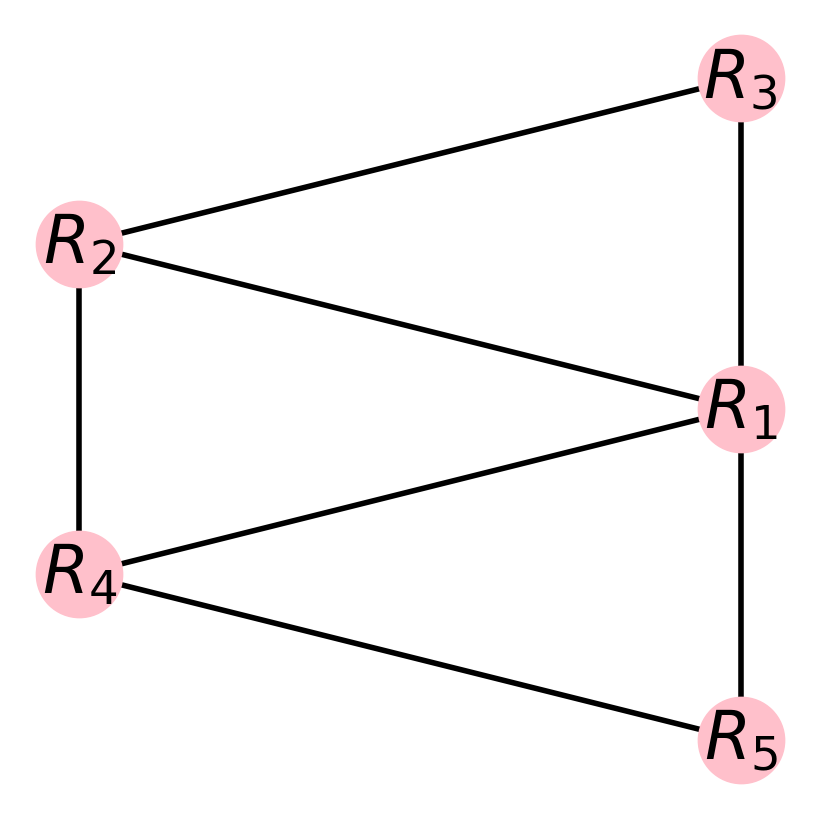

In [245]:
# Creating a intersection graph from hypergraph above
edges = [['$R_1$', '$R_2$'], ['$R_1$', '$R_3$'], ['$R_1$', '$R_4$'], ['$R_1$', '$R_5$'], ['$R_2$', '$R_3$'], ['$R_2$', '$R_4$'], ['$R_4$', '$R_5$']] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 

G.add_node('$R_2$', level=0)
G.add_node('$R_4$', level=0)
G.add_node('$R_3$', level=1)
G.add_node('$R_1$', level=1)
G.add_node('$R_5$', level=1)
G.add_node('$R_5$', level=1)


G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

colors = [u[1] for u in G.nodes(data="nodetype")]

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=4, linewidths=4,
    node_size=3500, font_size = 48, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)


plt.savefig("intersectionFamilySubtrees.png")

# Hypergaph

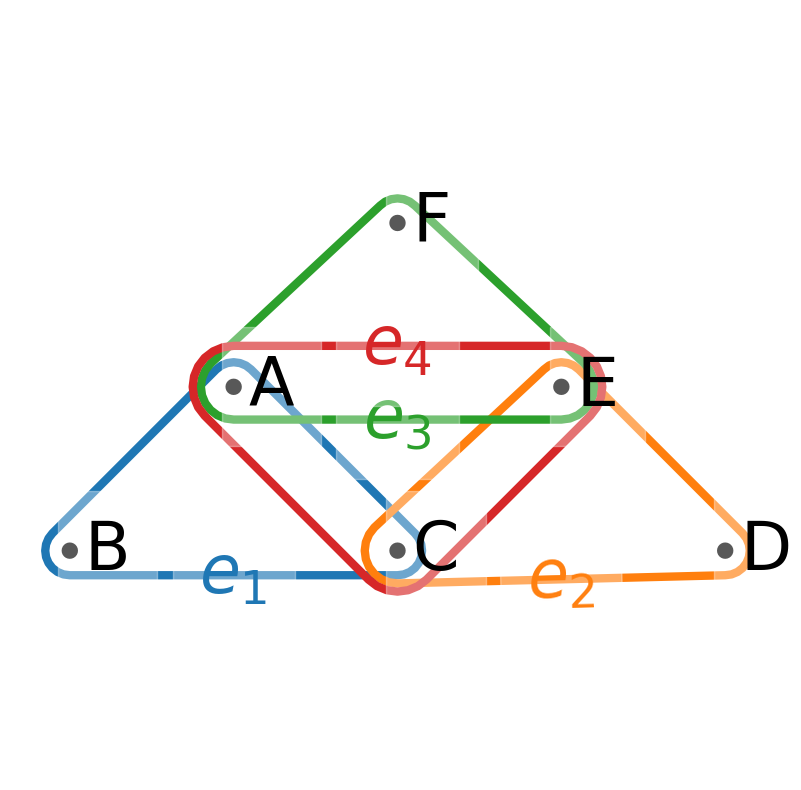

In [246]:
# Hypergraph

scenes = {
    '$e_1$': ['A', 'B', 'C'],
    '$e_2$': ['C', 'D', 'E'],
    '$e_3$': ['A', 'E', 'F'],
    '$e_4$': ['A', 'C', 'E']
}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    'A': (-4, 6),
    'B': (-8, 2),
    'C': (0, 2),
    'D': (8, 2),
    'E': (4, 6),
    'F': (0, 10)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    edge_labels_kwargs={
      'fontsize': 48
    },
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("hypergraphExample.png")

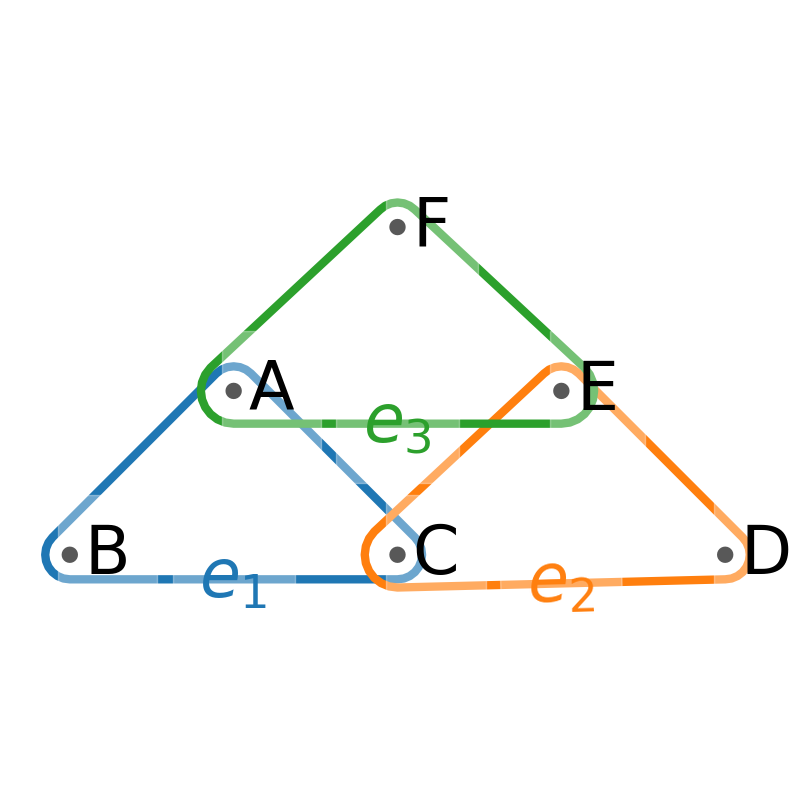

In [247]:
# Subhypergraph

scenes = {
    '$e_1$': ['A', 'B', 'C'],
    '$e_2$': ['C', 'D', 'E'],
    '$e_3$': ['A', 'E', 'F']
    # '$e_4$': ['A', 'C', 'E']
}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    'A': (-4, 6),
    'B': (-8, 2),
    'C': (0, 2),
    'D': (8, 2),
    'E': (4, 6),
    'F': (0, 10)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    edge_labels_kwargs={
      'fontsize': 48
    },
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("subHypergraphExample.png")

# Alpha Elimination

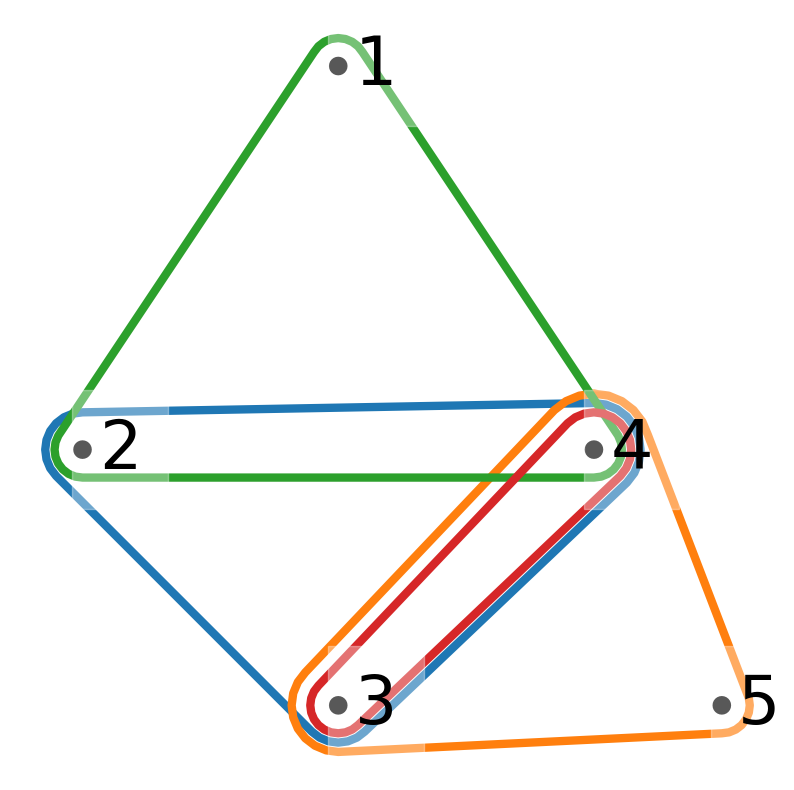

In [326]:
# Hypergraph

scenes = {'e0': [2, 3, 4], 'e1': [3, 4, 5], 'e2': [1, 2, 4], 'e3': [3, 4]}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (-6, 10),
    2: (-10, 4),
    3: (-6, 0),
    4: (-2, 4),
    5: (0, 0)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("alphaElimination1.png")

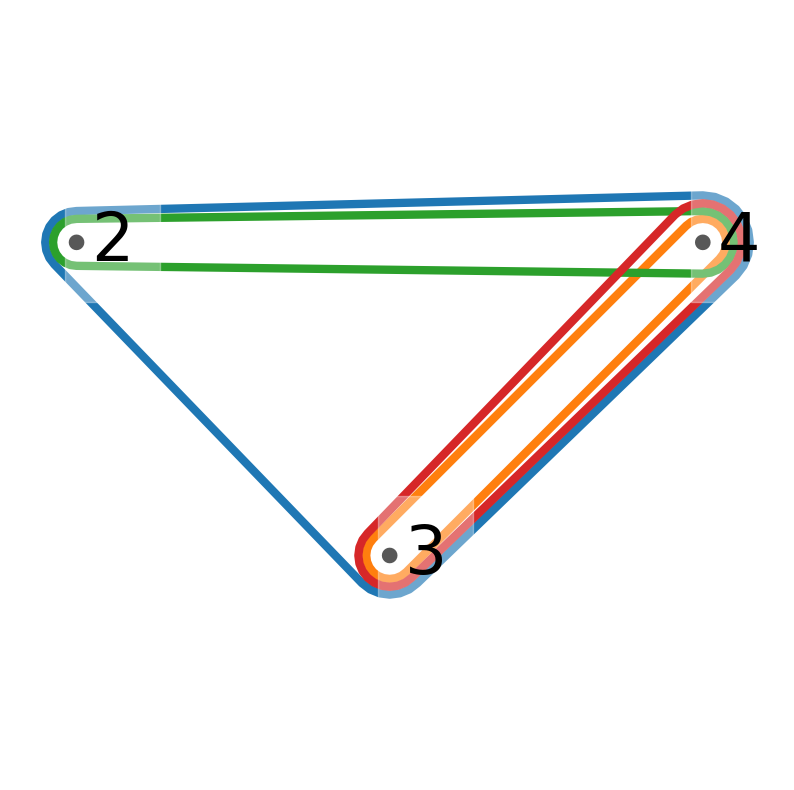

In [327]:
# Hypergraph(\{1,5})

scenes = {'e0': [2, 3, 4], 'e1': [3, 4], 'e2': [2, 4], 'e3': [3, 4]}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    2: (-10, 4),
    3: (-6, 0),
    4: (-2, 4),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("alphaElimination2.png")

# Beta vs Alpha Acyclic

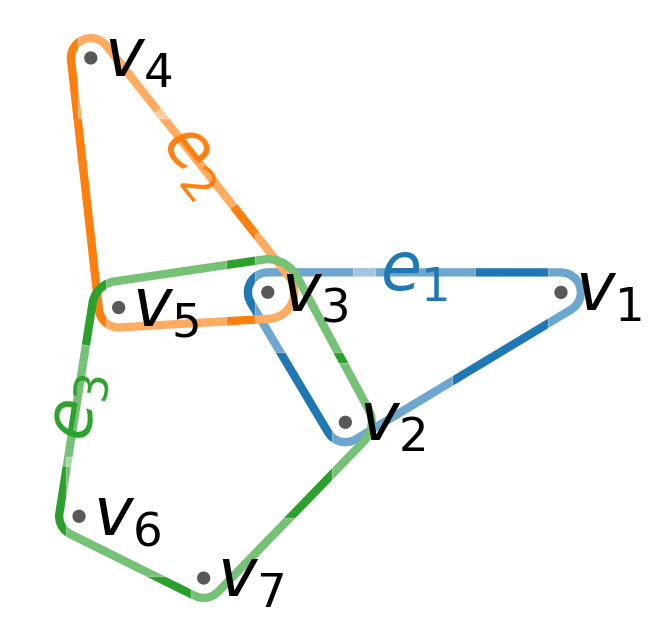

In [329]:
# \beta-acyclic hypergraph

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$'),
    '$e_2$': ('$v_3$', '$v_4$', '$v_5$'),
    '$e_3$': ('$v_2$', '$v_3$', '$v_5$', '$v_6$', '$v_7$')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 2}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 48
    },
    edge_labels_kwargs={
        'fontsize': 48
    },
    edges_kwargs={
        'linewidths': 6
    },
    **kwargs
)

plt.savefig("betaAcyclicHypergraph.png")


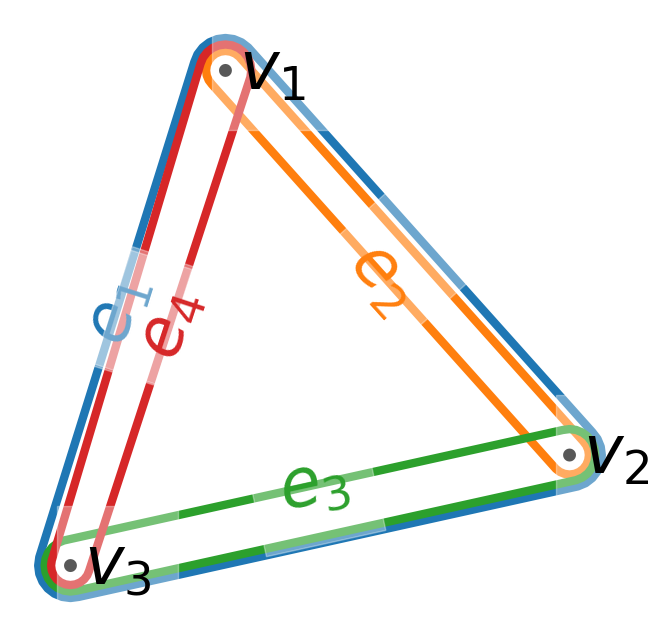

In [332]:
# \alpha acyclic, but not \beta-acyclic

# Beta Triangle

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$'),
    '$e_2$': ('$v_1$', '$v_2$'),
    '$e_4$': ('$v_1$', '$v_3$'),
    '$e_3$': ('$v_2$', '$v_3$')
}

H = hnx.Hypergraph(scenes)


kwargs = {'layout_kwargs': {'seed': 4}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 48
    },
    edge_labels_kwargs={
        'fontsize':48
    },
    edges_kwargs={
        'linewidths': 6
    },
    **kwargs
)

plt.savefig("alphaNoBetaAcyclicHypergraph.png")

# Nest-set Elimination Example 1

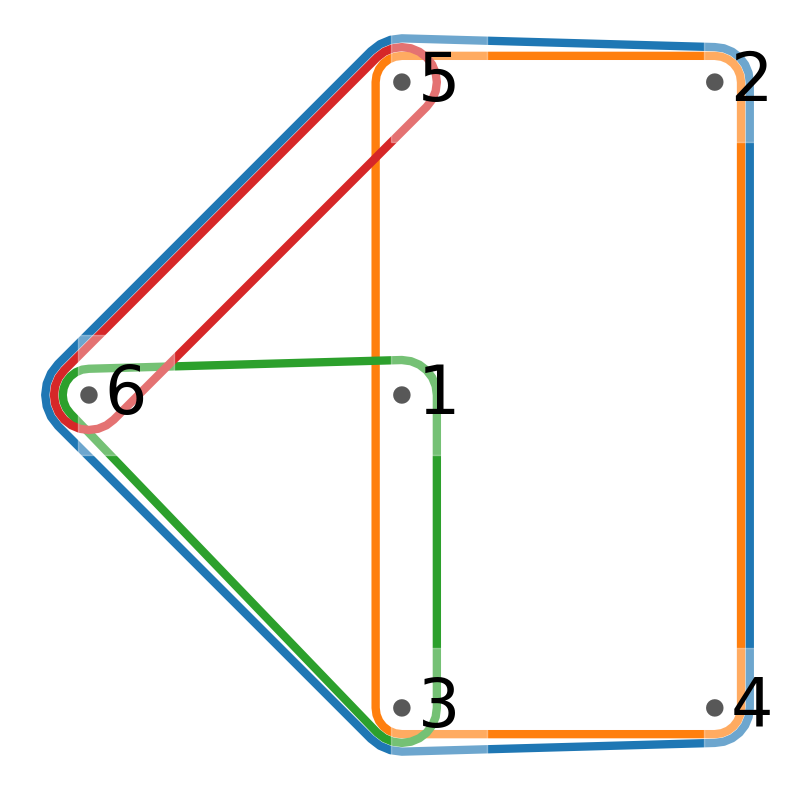

In [252]:
# Example 1 - Step 1

scenes = {"e0": [1, 2, 3, 4, 5, 6], "e1": [1, 2, 3, 4, 5], "e2": [1, 3, 6], "e3": [5, 6]}

H = hnx.Hypergraph(scenes)

# Hypergraph

ax.axis('off')
pos = {
    1: (5, 5),
    2: (10, 10),
    3: (5, 0),
    4: (10, 0),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample1.png")


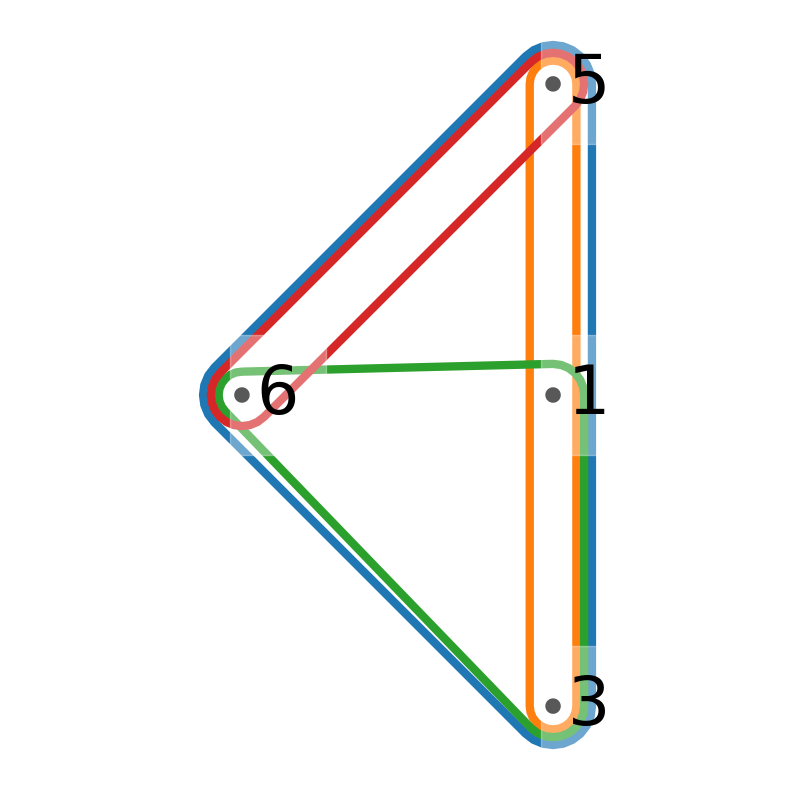

In [253]:
# Example 1 - Step 2

scenes = {"e0": [1, 3, 5, 6], "e1": [1, 3, 5], "e2": [1, 3, 6], "e3": [5, 6]}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 5),
    2: (10, 10),
    3: (5, 0),
    4: (10, 0),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample1H1.png")


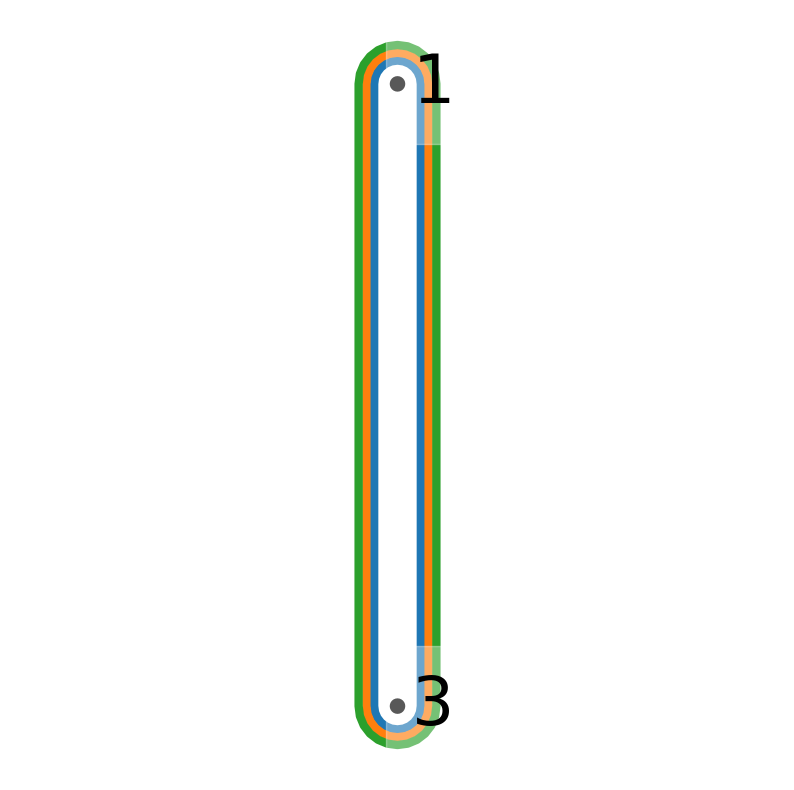

In [254]:
# Example 1 - Step 3

scenes = {"e0": [1, 3], "e1": [1, 3], "e2": [1, 3], "e3": []}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 5),
    2: (10, 10),
    3: (5, 0),
    4: (10, 0),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample1H2.png")


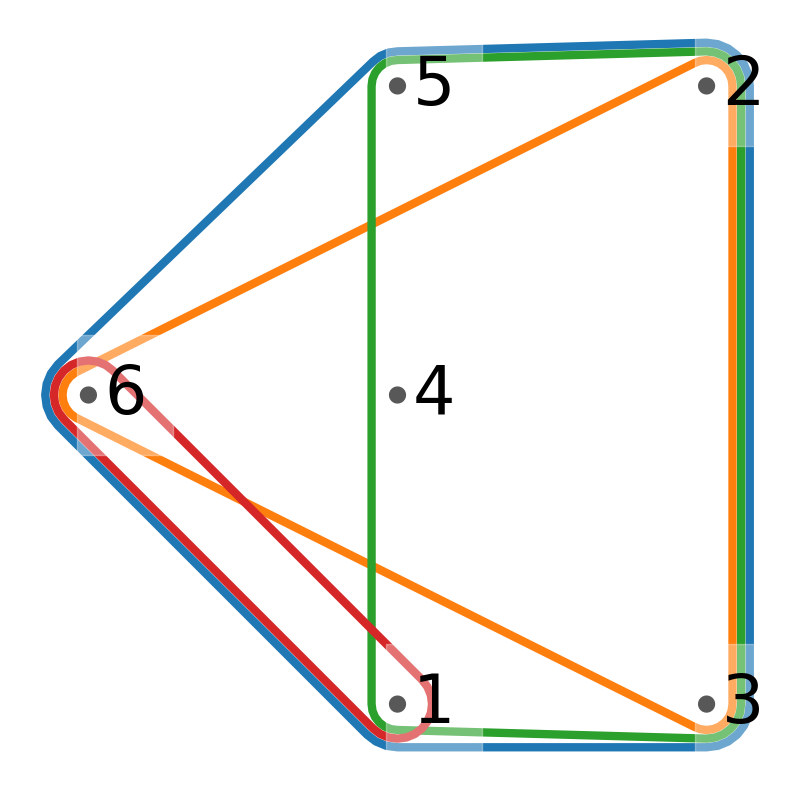

In [255]:
# Example 1 - Step 1

scenes = {"e0": [1, 2, 3, 4, 5, 6], "e1": [2, 3, 4, 6], "e2": [1, 2, 3, 5], "e3": [1,6]}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 0),
    2: (10, 10),
    3: (10, 0),
    4: (5, 5),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample2.png")


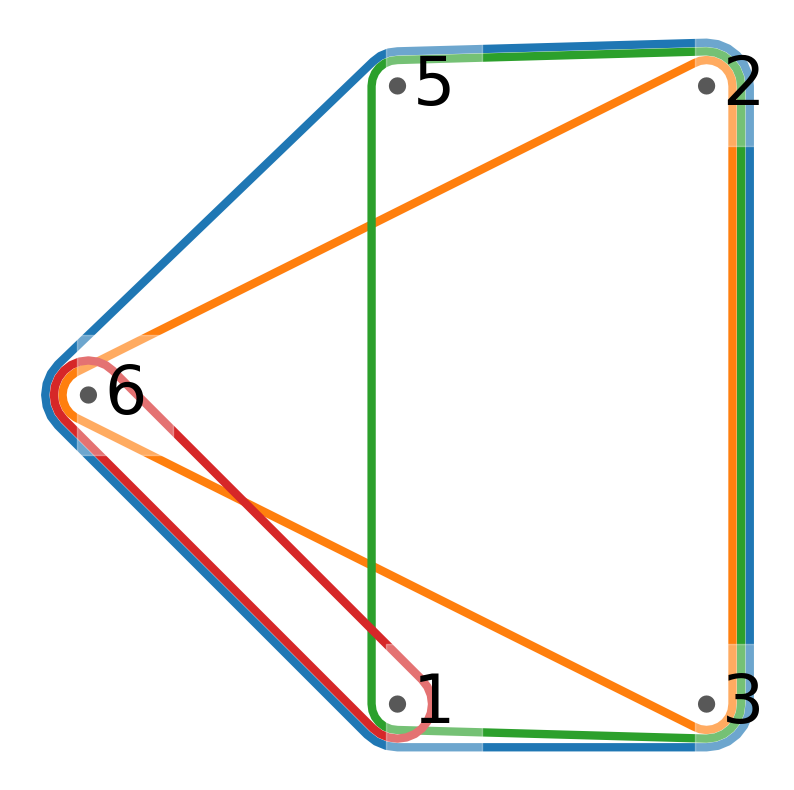

In [256]:
# Example 2 - Step 3

scenes = {"e0": [1, 2, 3, 5, 6], "e1": [2, 3, 6], "e2": [1, 2, 3, 5], "e3": [1,6]}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 0),
    2: (10, 10),
    3: (10, 0),
    4: (5, 5),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample2H1.png")


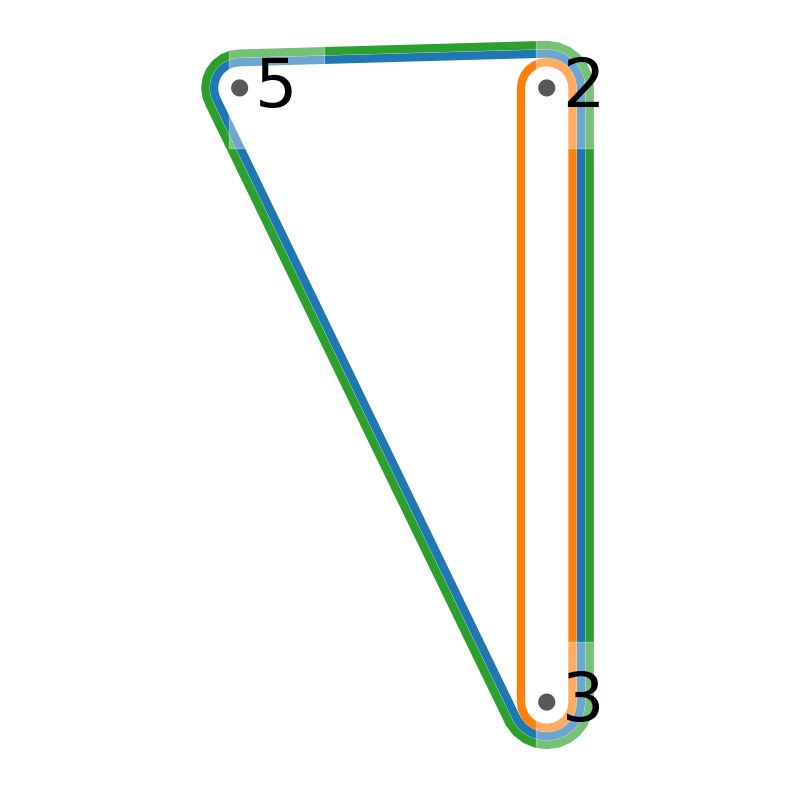

In [257]:
# Example 1 - Step 2

scenes = {"e0": [2, 3, 5], "e1": [2, 3], "e2": [2, 3, 5], "e3": []}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 0),
    2: (10, 10),
    3: (10, 0),
    4: (5, 5),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample2H2.png")


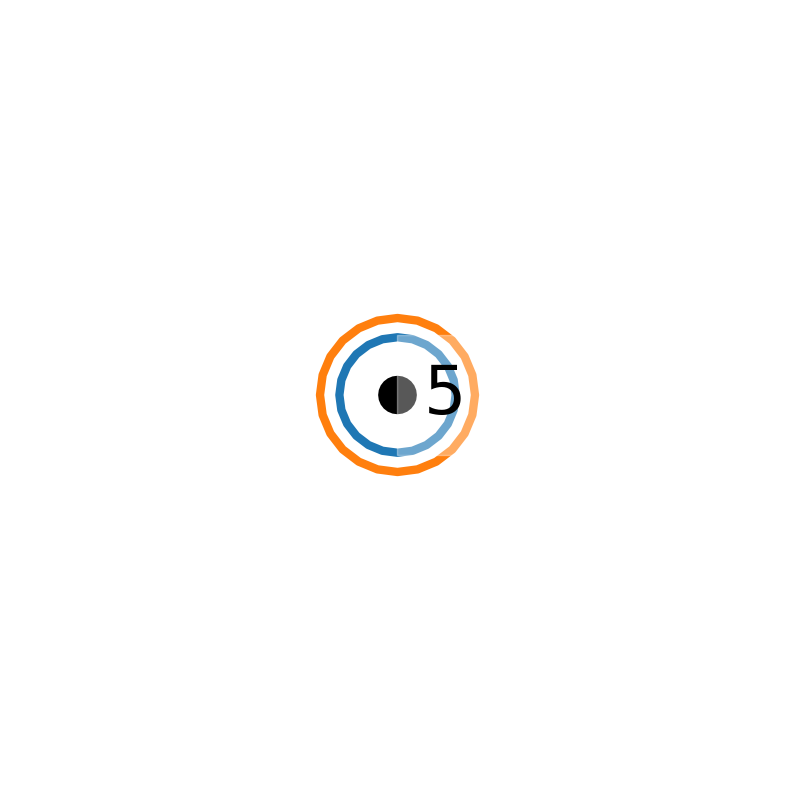

In [258]:
# Example 1 - Step 4

scenes = {"e0": [5], "e1": [], "e2": [5], "e3": []}

H = hnx.Hypergraph(scenes)

ax.axis('off')
pos = {
    1: (5, 0),
    2: (10, 10),
    3: (10, 0),
    4: (5, 5),
    5: (5, 10),
    6: (0, 5),
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
    }
)

plt.savefig("2NEOExample2H3.png")


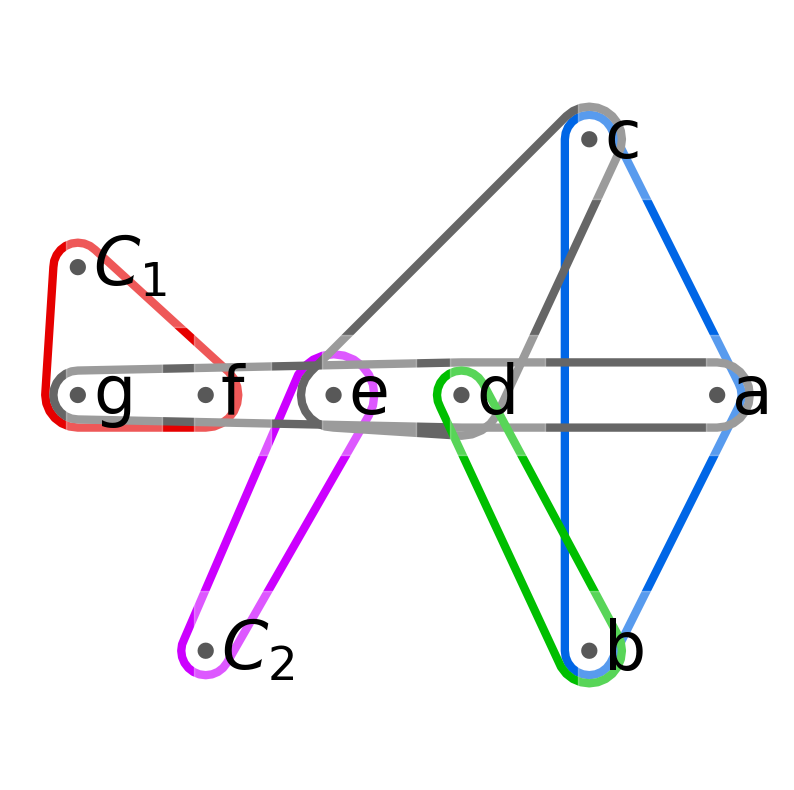

In [259]:
# s-elimination 1

scenes = {
    '$C$': ['a', 'b', 'c'],
    '$P$': ['b', 'd'],
    '$N_1$': ['a', 'd', 'e', 'f', 'g'],
    '$N_2$': ['c', 'd', 'e'],
    '$E_1$': ['$C_1$', 'g', 'f'],
    '$E_2$': ['$C_2$', 'e']
}

H = hnx.Hypergraph(scenes)

# colors = [
#     'gray' if e = '$R_1$' or e = '$R_2$' else 'red'
#     for e in H
# ]

# cmap = plt.cm.Blues
# alpha = .75

# sizes = np.array([H.size(e) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# dp = {id1: {prop1:val1, prop2,val2,...}, id2 : ... }
ax.axis('off')
pos = {
    'a': (10, 2),
    'b': (8, -2),
    'c': (8, 6),
    'd': (6, 2),
    'e': (4, 2),
    'f': (2, 2),
    'g': (0, 2),
    '$C_1$': (0, 4),
    '$C_2$': (2, -2)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
        'edgecolors': [(0,.4,.9,1),(.9,0,0,1),(.8,0,1,1),(.4,.4,.4,1),(.4,.4,.4,1),(0,.75,0,1)]
    }
)
plt.savefig('s-elim1.png')

# Data Scheme

[Diagram](https://dbdiagram.io/d/65394107ffbf5169f07243eb)

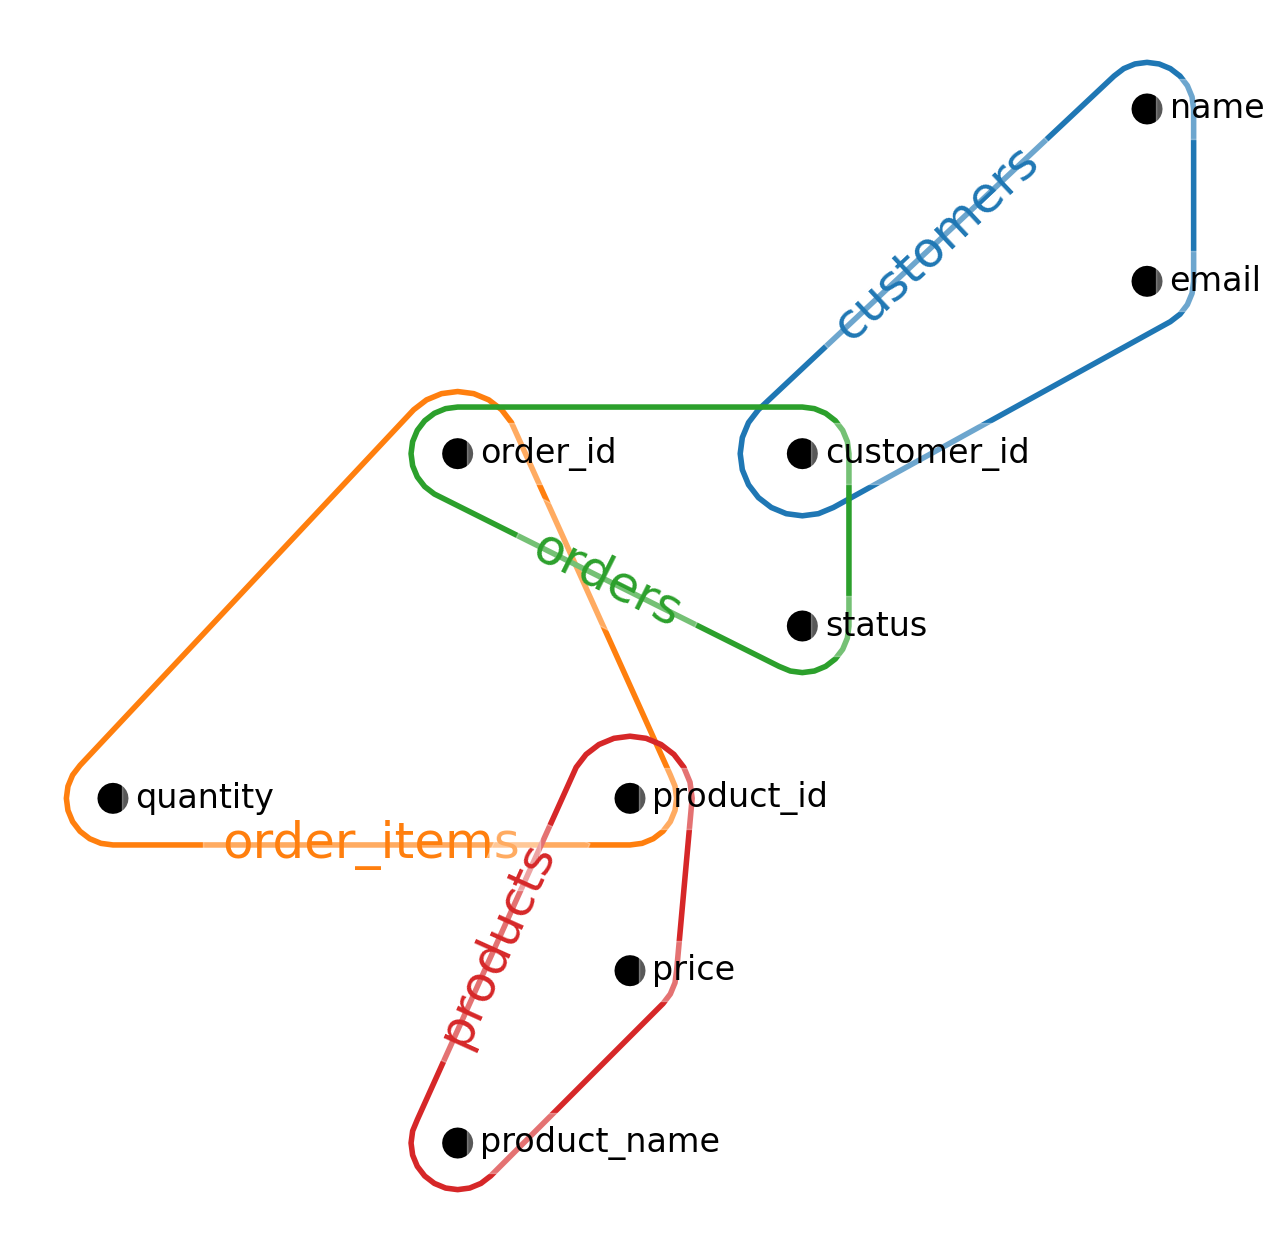

In [260]:
# Hypergraph of Data Scheme

scenes = {
    'orders': ['order_id', 'customer_id', 'status'],
    'customers': ['customer_id', 'name', 'email'],
    'order_items': ['order_id', 'product_id', 'quantity'],
    'products': ['product_id', 'product_name', 'price']
}

H = hnx.Hypergraph(scenes)


pos = {
    'name': (16, 16),
    'email': (16, 14),
    'customer_id': (12, 12),
    'order_id': (8, 12),
    'status': (12, 10),
    'product_id': (10, 8),
    'quantity': (4, 8),
    'price': (10,6),
    'product_name': (8, 4)
}

fig,ax = plt.subplots(1,1,figsize=(16,16))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4,
    },
)
plt.savefig('hypergraphDataScheme.png')

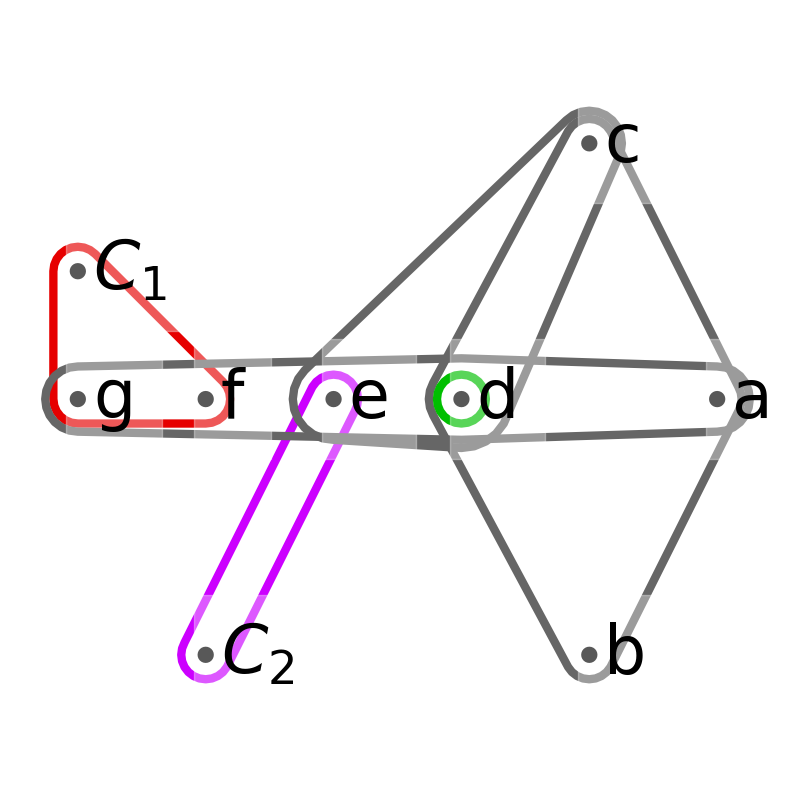

In [261]:
# s-elimination 2

scenes = {
    '$C$': ['a', 'b', 'c', 'd'],
    '$P$': ['d'],
    '$N_1$': ['a', 'd', 'e', 'f', 'g'],
    '$N_2$': ['c', 'd', 'e'],
    '$E_1$': ['$C_1$', 'g', 'f'],
    '$E_2$': ['$C_2$', 'e']
}

H = hnx.Hypergraph(scenes)

# colors = [
#     'gray' if e = '$R_1$' or e = '$R_2$' else 'red'
#     for e in H
# ]

# cmap = plt.cm.Blues
# alpha = .75

# sizes = np.array([H.size(e) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# dp = {id1: {prop1:val1, prop2,val2,...}, id2 : ... }
ax.axis('off')
pos = {
    'a': (10, 2),
    'b': (8, -2),
    'c': (8, 6),
    'd': (6, 2),
    'e': (4, 2),
    'f': (2, 2),
    'g': (0, 2),
    '$C_1$': (0, 4),
    '$C_2$': (2, -2)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
        'edgecolors': [(.4,.4,.4,1),(.9,0,0,1),(.8,0,1,1),(.4,.4,.4,1),(.4,.4,.4,1),(0,.75,0,1)]
    }
)
plt.savefig('s-elim2.png')

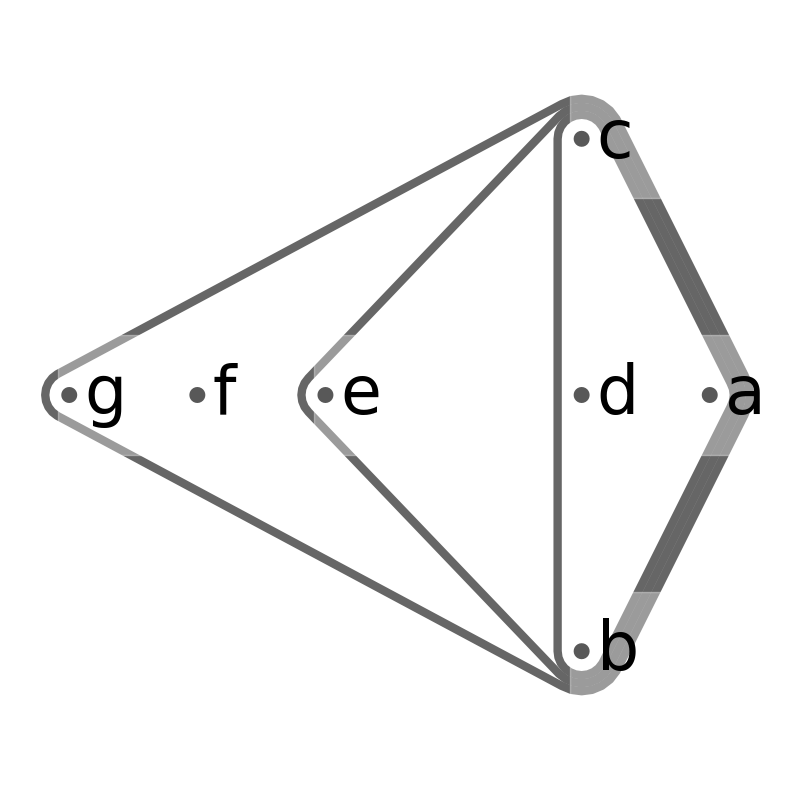

In [262]:
# s-elimination 3

scenes = {
    "$N_1^'$": ['a', 'd', 'e', 'f', 'g', 'b', 'c'],
    '$N_2$': ['c', 'd', 'e', 'a', 'b'],
    'C': ['a', 'b', 'c', 'd']
}

H = hnx.Hypergraph(scenes)

# colors = [
#     'gray' if e = '$R_1$' or e = '$R_2$' else 'red'
#     for e in H
# ]

# cmap = plt.cm.Blues
# alpha = .75

# sizes = np.array([H.size(e) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# dp = {id1: {prop1:val1, prop2,val2,...}, id2 : ... }
ax.axis('off')
pos = {
    'a': (10, 2),
    'b': (8, -2),
    'c': (8, 6),
    'd': (8, 2),
    'e': (4, 2),
    'f': (2, 2),
    'g': (0, 2),
    '$C_1$': (0, 0),
    '$C_2$': (2, -2)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
        'edgecolors': [(.4,.4,.4,1)]
    }
)
plt.savefig('s-elim3.png')

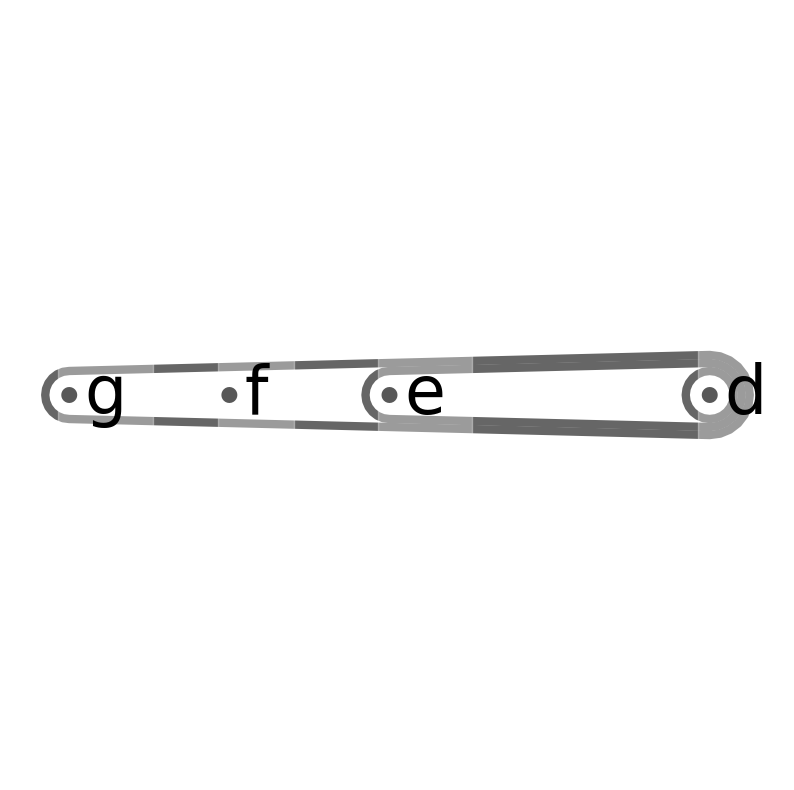

In [263]:
# s-elimination 4

scenes = {
    "$N_1^'$": ['d', 'e', 'f', 'g'],
    '$N_2$': ['d', 'e'],
    'C': ['d']
}

H = hnx.Hypergraph(scenes)

# colors = [
#     'gray' if e = '$R_1$' or e = '$R_2$' else 'red'
#     for e in H
# ]

# cmap = plt.cm.Blues
# alpha = .75

# sizes = np.array([H.size(e) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# dp = {id1: {prop1:val1, prop2,val2,...}, id2 : ... }
ax.axis('off')
pos = {
    'a': (10, 2),
    'b': (8, -2),
    'c': (8, 6),
    'd': (8, 2),
    'e': (4, 2),
    'f': (2, 2),
    'g': (0, 2),
    '$C_1$': (0, 0),
    '$C_2$': (2, -2)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
        'edgecolors': [(.4,.4,.4,1)]
    }
)
plt.savefig('s-elim4.png')

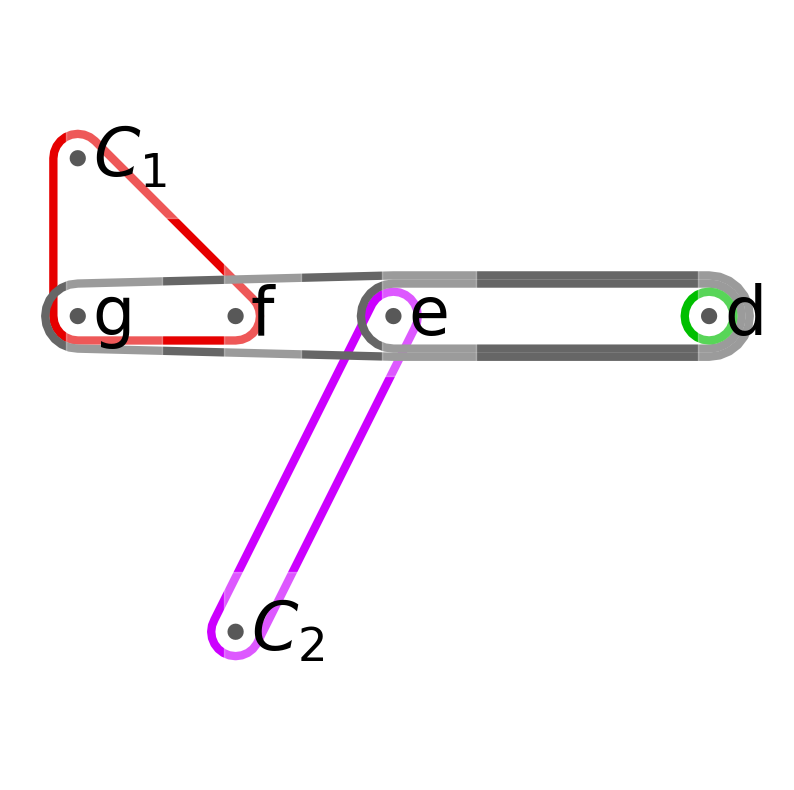

In [264]:
# s-elimination 5

scenes = {
    '$P_2$': ['d'],
    "$N_1^'$": ['d', 'e', 'f', 'g', ],
    '$N_2$': ['d', 'e'],
    '$E_1$': ['$C_1$', 'g', 'f'],
    '$E_2$': ['$C_2$', 'e']
}

H = hnx.Hypergraph(scenes)

# colors = [
#     'gray' if e = '$R_1$' or e = '$R_2$' else 'red'
#     for e in H
# ]

# cmap = plt.cm.Blues
# alpha = .75

# sizes = np.array([H.size(e) for e in H.edges()])
# norm = plt.Normalize(sizes.min(), sizes.max())

# dp = {id1: {prop1:val1, prop2,val2,...}, id2 : ... }
ax.axis('off')
pos = {
    'a': (10, 2),
    'b': (8, -4),
    'c': (8, 6),
    'd': (8, 2),
    'e': (4, 2),
    'f': (2, 2),
    'g': (0, 2),
    '$C_1$': (0, 4),
    '$C_2$': (2, -2)
}

fig,ax = plt.subplots(1,1,figsize=(10,10))

hnx.drawing.draw(H,
    ax=ax,
    pos=pos,
    node_labels_kwargs={
        'fontsize': 48
    },
    with_edge_labels=False,
    edges_kwargs={
        'linewidths': 6,
        'edgecolors': [(.9,0,0,1),(.8,0,1,1),(.4,.4,.4,1),(.4,.4,.4,1),(0,.75,0,1)]
    }
)
plt.savefig('s-elim5.png')